# Heart Disease Analysis and Prediction Using Machine Learning 

## Introduction 
Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmia); and heart defects you're born with (congenital heart defects), among others.
The term "heart disease" is often used interchangeably with the term "cardiovascular disease."Cardiovascular disease refers to conditions characterized by narrowed or blocked blood vessels, which can result in a heart attack, chest pain (angina), or stroke. Other heart conditions, such as those affecting your heart's muscle, valves, or rhythm, are also classified as heart disease. any types of heart disease can be avoided or treated by adopting a healthy lifestyle.

*Source:https://www.cdc.gov/heartdisease/about.htm*

## Symptoms 

- Chest pain, chest tightness, chest pressure and chest discomfort (angina)
- Shortness of breath
- Pain, numbness, weakness or coldness in your legs or arms if the blood vessels in those parts of your body are narrowed
- Pain in the neck, jaw, throat, upper abdomen or back

*Source:* https://www.cdc.gov/heartdisease/risk_factors.htm

## Objective(s)
- With the dataset provided for heart analysis, we have to analyse the possibilities of heart attack on the basis of various features, and then the prediction from the analysis will tell us that whether an individual is prone to heart attack or not.
- The detailed analysis can proceed with the exploratory data analysis (EDA).
- The classification for predication can be done using various machine learning model algorithms, choose the best suited model for heart attack analysis and finally save the model in the pickle (.pkl) file.

## Research Question(s)
- Does the age of a person contribute towards heart attack?
- Are different types of chest pain related to each other or the possibility of getting a heart attack?
- Does high blood pressure increase the risk of heart attack?
- Does the choestrol level eventually contribute as a risk factor towards heart attack?

## Dataset Information
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type 
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target :
    - 0 = less chance of heart attack
    - 1 = more chance of heart attack

*Data Source:* https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

## Data Analysis Pipeline
- Data Collection
- Importing Data
- Exploring Data 
- Data Cleaning
  - Handling Missing Data
  - Outlier Detection and Removal
- Exploring Data using Descriptive Statistics
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis
- Understanding Data using Visualizations
    - Univariate
      - Histograms
      - Density Plot
    - Bivariate
      - Scatter Plot
      - Boxplot
    - Multivariate
      - Correlation Matrix
      - Covariance Matrix
- Decision Making using Inferential Statistics
  - Hypothesis Testing(T-Test, Z-Test, Chi-square, ANOVA)

- Predictive Models 
  - Preprocessing Data for Machine Learning 
  - Creating Predicting Models
  - Interpreting Results

## Importing Dataset 

In [1]:
# import important packages for EDA & Data Preprocessing 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import researchpy as rp 
import warnings
warnings.filterwarnings("ignore") #to ignore the warnings
df = pd.read_csv('../data/heart.csv')

## Data Exploration

In [2]:
# examine first few rows 
df.head() 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# examine last few rows 
df.tail() 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
# shape of data
df.shape

(303, 14)

In [5]:
# data types 
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

### Comment
- Most of columns are already in `int` or `float` data types. 
- If the columns were not in `int` or `float` they were categorical variables. 
- We have to convert them for machine learning model building. 

In [6]:
# info 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Comment 
- There are 14 columns and 303 rows 
- All the columns except `oldpeak` are of `int` data type. 

In [7]:
# check missing values 
df.isnull().sum() 

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Comment 
- Looks great! 
- There are no missing values.

In [8]:
# column names 
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
# check duplicate rows 
df.duplicated().sum() 

1

## Comment 
- There is 1 duplicate row. 
- We have to drop it. 

In [10]:
# Count of each row
df.count()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

In [11]:
# let's drop the duplicate row 
df.drop_duplicates(inplace=True)
# print the shape of data 
df.shape

(302, 14)

In [12]:
# check again 
df.duplicated().sum() 

0

## Exploring Data using Descriptive Statistics

In [17]:
# summary statistics: using pandas 
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [19]:
# summary stats using researchpy 
rp.summary_cont(df)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,303.0,54.3663,9.0821,0.5218,53.3396,55.3931
1,sex,303.0,0.6832,0.4660,0.0268,0.6305,0.7359
2,cp,303.0,0.9670,1.0321,0.0593,0.8503,1.0837
3,trtbps,303.0,131.6238,17.5381,1.0075,129.6411,133.6065
4,chol,303.0,246.2640,51.8308,2.9776,240.4046,252.1235
5,fbs,303.0,0.1485,0.3562,0.0205,0.1082,0.1888
6,restecg,303.0,0.5281,0.5259,0.0302,0.4686,0.5875
7,thalachh,303.0,149.6469,22.9052,1.3159,147.0574,152.2363
8,exng,303.0,0.3267,0.4698,0.0270,0.2736,0.3798
9,oldpeak,303.0,1.0396,1.1611,0.0667,0.9083,1.1709


### Comment 
- The average blood pressure of an individual is 130 whereas the maximum value goes upto 200. 


In [45]:
# target 
df.output.value_counts() 

1    165
0    138
Name: output, dtype: int64

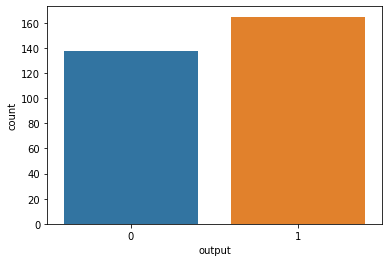

In [46]:
sns.countplot(x='output', data=df)

In [48]:
# sex 
df.sex.value_counts() 

1    207
0     96
Name: sex, dtype: int64

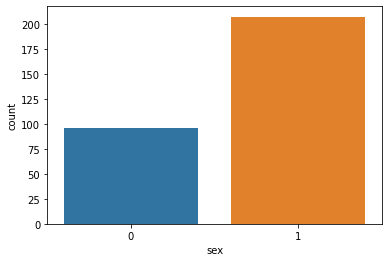

In [51]:
sns.countplot(x='sex', data=df)

In [54]:
rp.crosstab(df['sex'], df['output'])

output          
output      0    1  All
sex                    
0          24   72   96
1         114   93  207
All       138  165  303

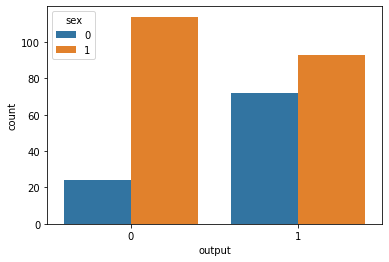

In [50]:
# by sex 
sns.countplot(x='output', hue='sex', data=df)

### Comment 
- There are more males than females in this study.
- The number of people belonging to sex category 0(male) are 96 whereas 1(females) are 207. 
- There are more males diagnosed with heart disease than females.  

In [13]:
# age range 
df.groupby(['age', 'sex']).size() 

age  sex
29   1      1
34   0      1
     1      1
35   0      1
     1      3
           ..
70   1      4
71   0      3
74   0      1
76   0      1
77   1      1
Length: 73, dtype: int64

In [14]:
# maximum age 
df.age.max() 

77

In [15]:
# minimum age 
df.age.min() 

29

In [20]:
# crete frequency dataframe
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins= [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()

In [21]:
freq_df

age
Less than 10      0
10-20             0
20-30             1
30-40            17
40-50            76
50-60           129
60-70            73
70 and more       6
dtype: int64

In [22]:
# reset index 
freq_df = freq_df.reset_index(name="count")
freq_df

,age,count
0,Less than 10,0
1,10-20,0
2,20-30,1
3,30-40,17
4,40-50,76
5,50-60,129
6,60-70,73
7,70 and more,6


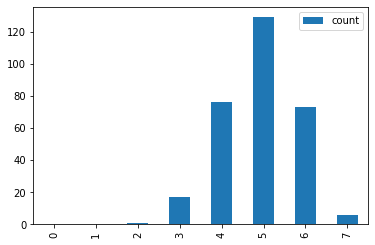

In [23]:
# barplot 
freq_df.plot(kind='bar')

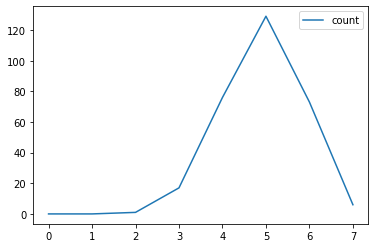

In [24]:
# line plot 
freq_df.plot(kind='line')

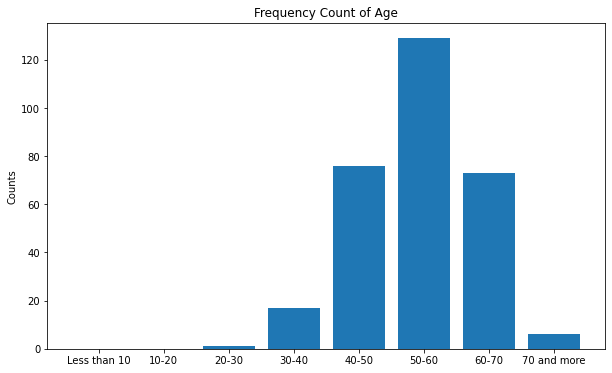

In [28]:
# Plot of Freq Table
plt.figure(figsize=(10,6))
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

<Figure size 720x432 with 0 Axes>

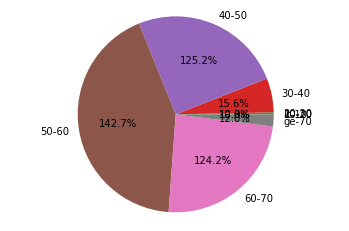

In [30]:
# Pie chart
plt.figure(figsize=(10,6))
labels = ['lt-10',"10-20","20-30","30-40","40-50","50-60","60-70","ge-70"]
fig1,ax1 = plt.subplots()
ax1.pie(freq_df['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 

In [39]:
models = {
    "LR": LogisticRegression(),
    "RF": RandomForestClassifier(),
    "DT": DecisionTreeClassifier(), 
    "SVC": SVC() 
} 

In [40]:
X = df.drop('output', axis = 1)
y = df['output']
df.reset_index(drop=True, inplace=True)
columns_to_scale = df.iloc[:,[0,3,4,7,9,]]
columns_to_scale

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ss = StandardScaler()
scaled_values = ss.fit_transform(columns_to_scale)
scaled_values = pd.DataFrame(scaled_values, columns=columns_to_scale.columns)
scaled_values

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244
...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373
300,1.503641,0.706843,-1.029353,-0.378132,2.036303
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373


In [27]:
scaled_df = pd.concat([scaled_values,df.iloc[:,[1,2,5,6,8,10,11,12,13]]],axis=1)
scaled_df

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,3,1,0,0,0,0,1,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,2,0,1,0,0,0,2,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,0,0,2,0,2,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,0,1,0,2,0,2,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,0,0,1,1,1,0,3,0
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,1,3,0,1,0,1,0,3,0
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,1,0,1,1,0,1,2,3,0
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,1,0,0,1,1,1,1,3,0


In [28]:
from sklearn.metrics import accuracy_score

In [43]:
prections = [] 
for name, model in models.items(): 
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    prections.append(acc) 
    print(name, ":", acc)

LR : 0.8852459016393442
RF : 0.819672131147541
DT : 0.8032786885245902
SVC : 0.7049180327868853
